# Practice 5: Dimensional Reduction with PCA

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**

**Video Walkthough by Tom**

# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

## The data sets
We will work with the following data sets:
- Section I: Iris flower dataset from Practice 2 & 4
- Section II: Breast cancer data from Project 1 & 2
- Section III: [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits. This is our first image data set. Each image is 16x16 grayscale pixels. 
<p>
Here is a sample of the images.
  
  ![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

# Section I
=== *You must run Section 0 before this section* ===
### Principal Component Analysis (PCA) and the Iris flower data set

Remember the iris flower data set has four features for each flower. We can use PCA to reduce this to two features--this is called **dimensonal reduction**.



In [0]:
# Read in the iris data file from stored in a raw file in GitHub
url_iris = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/Iris.csv'
iris = pd.read_csv(url_iris)
# Set the Id column as the index since it is unique for each flower
iris.set_index('Id', inplace=True)

In [3]:
# Display the first 5 flowers to make sure the data was read in
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Set up the input and output 
In the past we have called the input **"X"** and the output **"y"** but when working with multiple datasets we will use **"Xiris"** for the input features for the iris flower dataset. Likewise we will use **"yiris"** for the output categories for the iris flowers.

Also, for the graphs below we need numerica categories along with the text categories like "Iris-setosa" so the code below creates a new category named **"species_code"** which is a category number for each flower.

In [0]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
Xiris = iris[feature_columns].values
yiris = iris['Species'].values
# We need the species labels converted to number for one of the graphs. Use LabelEncoder for this
lb_make = LabelEncoder()
species_code = lb_make.fit_transform(iris["Species"])

### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is built into the scikit learn library and was imported above using
```
from sklearn.decomposition import PCA
```
To use PCA, we just have to call it and pass it the number of features we want in the results using the "n_components" parameter. So this line creates a PCA system to reduce the data down to just 2 dimensions or components.

```
pca2 = PCA(n_components=2)
```
Once the PCA system is created and named "pca2" we can us it to transform the iris input features. This will reduce the 4 features down to 2 components. 

```
XirisPCA2 = pca2.fit_transform(Xiris)
```
The new inputs are named "XirisPCA2"







In [0]:
# Use Pincipal Component Analysis (PCA) to reduce the data to two dimensions using n_components=2
pca2 = PCA(n_components=2)
XirisPCA2 = pca2.fit_transform(Xiris)


### Plot the original data
This plot shows the two of the four features in the original data set.

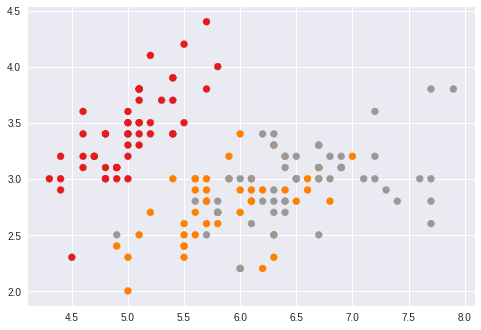

In [6]:
# Plot two feactures from the original iris dataset
plt.scatter(Xiris[:,0], Xiris[:,1], c=species_code, cmap="Set1")

### Plot the PCA components
This plot shows the data using the two components from the PCA system above.

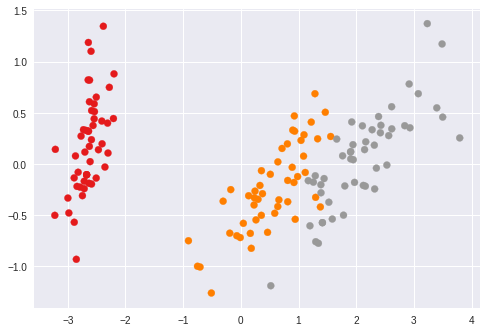

In [7]:
# Plot the PCA1 and PCA2 from the iris dataset
plt.scatter(XirisPCA2[:,0], XirisPCA2[:,1], c=species_code, cmap="Set1")


## Task 1: Describe PCA
- Question 1: Find a short description of what PCA does and paste it here along with the URL of the source.
- Question 2: Describe the two visualizations above, one showing the original data and one showing the PCA version of the data. Which data set would be best for categorizing the data?

# Section II
=== *You must run Section 0 before this section* ===
### PCA with the cancer dataset
The following code loads in the breast cancer dataset

In [0]:
 
  # Read in the breast cancer data file from stored in a raw file in GitHub
url_bc = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/breast-cancer-wisconsin-data.csv'

cancer = pd.read_csv(url_bc)
# Set the Id column as the index since it is unique for each pati
cancer.set_index('id', inplace=True)

In [9]:
# Display the first 5 rows at the start, or head, of the dataframe
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Set up the Input and output, X and y

Here we will use Xcancer and ycancer instead of X and y for the input features and output categories.

This data set has 569 tumors with 30 features on each tumor, along with each tumor's category as Benign or Malignant.

We will also scale the data so that all features are converted to the range of 0 to +1

In [0]:
# === Select all the data for input ===
Xcancer = cancer.iloc[:, 1:31] 

# The output is the diagnosis where M is Malignant and B is Benign
ycancer = cancer['diagnosis'].values

In [0]:
# Scale the data to put large features like area_mean on the same footing as small features like smoothness_mean
scaler = StandardScaler()
Xcancer = scaler.fit_transform(Xcancer)

### Apply PCA with different number of components
As before, we use the scikit learn library for the PCA method. In Section 0 we have imported the PCA libary from sklearn:
```
from sklearn.decomposition import PCA
```
Now we create a PCA system and specify the number of components or dimensions in the result. Then we use this PCA system to transform the data into the given number of components. Since we don't know which will be better, we will reduce the dimensions of the 30 input features to 
- **XcancerPCA1** which uses pca1 to reduce 30 features to just 1 component
- **XcancerPCA3** which uses pca3 to reduce 30 features to just 3 components
- **XcancerPCA5** which uses pca5 to reduce 30 features to just 5 components



In [0]:
pca1 = PCA(n_components=1)
XcancerPCA1 = pca1.fit_transform(Xcancer)

pca3 = PCA(n_components=3)
XcancerPCA3 = pca3.fit_transform(Xcancer)

pca5 = PCA(n_components=5)
XcancerPCA5 = pca5.fit_transform(Xcancer)

In [0]:
# We will not split the data into training and testing for this activity 

# Split the data into 80% for training and 20% for testing out the models
# Xcancer_train, Xcancer_test, ycancer_train, ycancer_test = train_test_split(Xcancer, ycancer.ravel(), test_size=0.2)
# XcancerPCA5_train, XcancerPCA5_test, ycancerPCA5_train, ycancerPCA5_test = train_test_split(XcancerPCA5, ycancer.ravel(), test_size=0.2)


## Task 2: Test K-Nearest Neighbors

The code below runs KNN using the three closest neighbors. It uses KNN on:
- The original data with 30 features, Xcancer
- Data reduced to 1 component with PCA, XcancerPCA1
- Data reduced to 3 component with PCA, XcancerPCA3
- Data reduced to 5 component with PCA, XcancerPCA5


 ### Analyze at the scores
 - How close were the scores?
 - Did PCA improve the scores?
 - If PCA did not improve the scores, would it reduce the memory or time needed to run the KNN algorithm?
---


In [13]:
# Run KNN on original data with 30 features
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(Xcancer, ycancer)
score = knn_model.score(Xcancer, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.98


In [14]:
# Run KNN on data reduced to 1 component, XcancerPCA1
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(XcancerPCA1, ycancer)
score = knn_model.score(XcancerPCA1, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.94


In [15]:
# Run KNN on data reduced to 3 component, XcancerPCA3
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(XcancerPCA3, ycancer)
score = knn_model2.score(XcancerPCA3, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.97


In [16]:
# Run KNN on data reduced to 5 component, XcancerPCA5
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(XcancerPCA5, ycancer)
score = knn_model2.score(XcancerPCA5, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.98


## Task 3: Test Support Vector Machines (SVM)

The code below runs SVM on:
- The original data with 30 features, Xcancer
- Data reduced to 1 component with PCA, XcancerPCA1
- Data reduced to 3 component with PCA, XcancerPCA3
- Data reduced to 5 component with PCA, XcancerPCA5


 ### Analyze at the scores
 - How close were the scores?
 - Did PCA improve the scores?
 - If PCA did not improve the scores, would it reduce the memory or time needed to run the KNN algorithm?
---


In [17]:
# Set up SVM model with a given kernel and c parameter
svm_model = SVC(C=1.0, kernel='linear')          # linear SVM
svm_model.fit(Xcancer, ycancer)
score = svm_model.score(Xcancer, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.99


In [18]:
# Run SVM on data reduced to 1 component, XcancerPCA1
svm_model = SVC(C=1.0, kernel='linear')          # linear SVM
svm_model.fit(XcancerPCA1, ycancer)
score = svm_model.score(XcancerPCA1, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.91


In [19]:
# Run SVM on data reduced to 3 component, XcancerPCA3
svm_model = SVC(C=1.0, kernel='linear')          # linear SVM
svm_model.fit(XcancerPCA3, ycancer)
score = svm_model.score(XcancerPCA3, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.96


In [20]:
# Run SVM on data reduced to 5 component, XcancerPCA5
svm_model = SVC(C=1.0, kernel='linear')          # linear SVM
svm_model.fit(XcancerPCA5, ycancer)
score = svm_model.score(XcancerPCA5, ycancer)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.98


# Section III 
=== *You must run Section 0 before this section* ===
### MNIST hand written digits

We will load the MNIST data set built into the scikit learning library.

The images are 16x16 pixels which means each image has 64 features. This is now getting large enought so that dimensional reduction might be useful.



In [0]:
# The digits dataset from the SciKit Learn sample data sets
digits = datasets.load_digits()

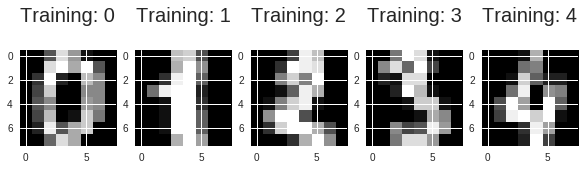

In [22]:
# Display the first five images
# This code is from https://www.codementor.io/mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


In [0]:
# Set up the training input, X, and output, y

Xdigits = digits.data
ydigits = digits.target

In [0]:
# We will not split the data into training and testing to keep this simple

# Split the data into 80% for training and 20% for testing out the models
# Xdigits_train, Xdigits_test, ydigits_train, ydigits_test = train_test_split(Xdigits, ydigits.ravel(), test_size=0.2)



## Task 4: SVM with MNIST digits

Using all 64 pixels, Support Vector Machines can recognize the correct digit from an MNIST image nearly 100% of the time. 

Use the two code blocks below to try different number of components which still reduces the featues significantly while keeping prediction scores relatively high. In the starting example, reducing the 64 features to only 3 components reduces the score a lot to only 72%


 ### Find a good balance 
 - Find a good balance between the number of components and the prediction score. What value for n_components results in a good score while still reducing the number of features significantly?
 
---


In [0]:
# Use PCA to reduce the data to just a few components
pca3 = PCA(n_components=3)
XdigitPCA3 = pca3.fit_transform(Xdigits)

In [25]:
# Run SVM on data reduced to 3 component, XcancerPCA3
svm_model = SVC(C=1.0, kernel='linear')          # linear SVM
svm_model.fit(XdigitPCA3, ydigits)
score = svm_model.score(XdigitPCA3, ydigits)
print ("The score for this model is ", format(score, ",.2f"))

The score for this model is  0.72


## Task 5: PCA for noise reduction

Read the section on [PCA as Noise Filtering](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html#PCA-as-Noise-Filtering) from In Depth: Principal Component Analysis in the Python Data Science Handbook


 ### Summarize 
 - In a couple sentences, summarize this section of the article.
 
---


# Wrapping Up

Remember to **share this sheet with your instructo**r and submit a link to it in Blackboard.